<a href="https://colab.research.google.com/github/kukorenko/Python-2/blob/main/_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.figure_factory as ff
import numpy as np
import scipy. stats as stats

ЗАДАНИЕ 1

In [ ]:
df = pd.read_csv('/content/HR.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Файл успешно загружен

ЗАДАНИЕ 2

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Вычислены основные статистики для переменных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


ЗАДАНИЕ 3

Расчет и визуализация корреляционной матрицы

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='seismic')

<ipython-input-7-90b00406d125>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Две самые скоррелированные переменные - average_montly_hours и number_project; две наименее скоррелированные переменные - Work_accident и time_spend_company


ЗАДАНИЕ 4

In [ ]:
agg_func_count = {'department': ['count']}
df.groupby(['department']).agg(agg_func_count)

,department
,count
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140


Рассчет количества сотрудников в зависимости от департамента

ЗАДАНИЕ 5

Распределение сотрудников в зависимости от уровней зарплаты

In [ ]:
agg_func_salary_count = {'salary': ['count']}
df.groupby(['salary']).agg(agg_func_salary_count)

,salary
,count
salary,
high,1237
low,7316
medium,6446


ЗАДАНИЕ 6

Распределение сотрудников по уровням зарплаты по каждому департаменту в отдельности

In [ ]:
df.pivot_table(index='department', columns='salary', values='satisfaction_level', aggfunc='count').head(10)

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


ЗАДАНИЕ 7

Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

Формулируем гипотезу для проверки


H0: average_montly_hours	при salary = high > average_montly_hours	при salary = low

H1: average_montly_hours	при salary = high <= average_montly_hours	при salary = low

Выделим данные по средним отработанным часам в зависимости от уровня зарплаты

In [ ]:
salary_levels = df.groupby('salary')['average_montly_hours'].apply(list)
salary_levels.head()

salary
high      [149, 289, 156, 129, 149, 278, 156, 143, 255, ...
low       [157, 223, 159, 153, 247, 259, 224, 142, 135, ...
medium    [262, 272, 226, 308, 244, 132, 286, 161, 153, ...
Name: average_montly_hours, dtype: object

Выделим данные только по высокому и низкому уровням зарплаты

In [ ]:
high_salary = salary_levels['high']
low_salary = salary_levels['low']

Посмотрим на распределение данных в выделенных группах

(array([ 5., 17., 13., 13.,  9., 24., 43., 35., 50., 47., 51., 65., 41.,
        50., 38., 46., 51., 31., 44., 50., 45., 32., 51., 45., 43., 39.,
        51., 53., 38., 54., 30., 13., 15.,  2.,  1.,  2.]),
 array([ 96.        , 101.86111111, 107.72222222, 113.58333333,
        119.44444444, 125.30555556, 131.16666667, 137.02777778,
        142.88888889, 148.75      , 154.61111111, 160.47222222,
        166.33333333, 172.19444444, 178.05555556, 183.91666667,
        189.77777778, 195.63888889, 201.5       , 207.36111111,
        213.22222222, 219.08333333, 224.94444444, 230.80555556,
        236.66666667, 242.52777778, 248.38888889, 254.25      ,
        260.11111111, 265.97222222, 271.83333333, 277.69444444,
        283.55555556, 289.41666667, 295.27777778, 301.13888889,
        307.        ]),
 <BarContainer object of 36 artists>)

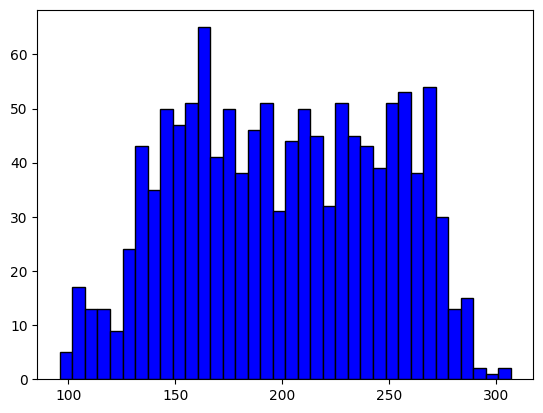

In [ ]:
plt.hist(high_salary, color = 'blue', edgecolor = 'black', bins = int(180/5))

(array([ 46.,  45.,  49.,  39.,  47., 186., 342., 351., 390., 380., 370.,
        225., 244., 239., 243., 196., 216., 167., 204., 192., 232., 268.,
        216., 233., 280., 308., 294., 318., 274., 266., 128., 109.,  58.,
         53.,  47.,  61.]),
 array([ 96.        , 101.94444444, 107.88888889, 113.83333333,
        119.77777778, 125.72222222, 131.66666667, 137.61111111,
        143.55555556, 149.5       , 155.44444444, 161.38888889,
        167.33333333, 173.27777778, 179.22222222, 185.16666667,
        191.11111111, 197.05555556, 203.        , 208.94444444,
        214.88888889, 220.83333333, 226.77777778, 232.72222222,
        238.66666667, 244.61111111, 250.55555556, 256.5       ,
        262.44444444, 268.38888889, 274.33333333, 280.27777778,
        286.22222222, 292.16666667, 298.11111111, 304.05555556,
        310.        ]),
 <BarContainer object of 36 artists>)

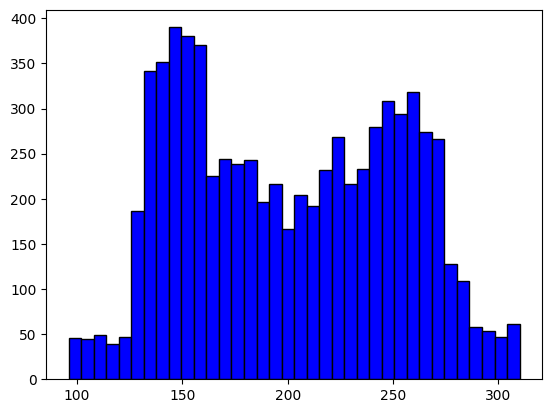

In [ ]:
plt.hist(low_salary, color = 'blue', edgecolor = 'black', bins = int(180/5))

Данные не имеют нормального распределния, необходимо провести тест Уилкоксона

Определим число данных в каждом диапазоне

In [ ]:
len(high_salary)

1237

In [ ]:
len(low_salary)

7316

Так как наборы данных не равны по числу элементов, необходимо провести тест Манна-Уитни - разновидность теста Уилкоксона для выборок разного размера

In [ ]:
from scipy.stats import mannwhitneyu

Рассчитаем статистику и p-value

In [ ]:
statistic, p_value = mannwhitneyu(high_salary, low_salary)

In [ ]:
print("Статистика теста:", statistic)
print("p-значение:", p_value)

Статистика теста: 4507096.5
p-значение: 0.8241330720858693


Определим, есть ли между выборками статистически значимые различия, используя уровень значимости alpha = 0.05

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Различия статистически значимы")
else:
    print("Нет статистически значимых различий")

Нет статистически значимых различий


Вывод - статистически значимых различий у данных выборок нет,значит мы отвергаем нулевую гипотезу и принимаем альтернативную - работники с более высоким окладом не проводят на работе больше времени, чем работники с низким окладом

ЗАДАНИЕ 8

Рассчитать показатели среди уволившихся и неуволившихся сотрудников по отдельности

1. Доля сотрудников с повышением за последние 5 лет

Создаем датафрейм только с необходимыми столбцами данных

In [ ]:
df_calc = df[['left','promotion_last_5years', 'satisfaction_level', 'number_project']]

Выделяем отдельно данные по уволенным и работающим сотрудникам

In [ ]:
df_calc_fired = df_calc[df_calc['left']==1]
df_calc_nonfired = df_calc[df_calc['left']==0]

Прописываем функцию, которая будет вычислять долю тех, кто получил повышение от всего числа сотрудников в каждом датафрейме

In [ ]:
def share_count(data_frame):
  return data_frame[data_frame['promotion_last_5years'] == 1].count()/data_frame['promotion_last_5years'].count()

Вычисляем долю тех, кого повышали, для данных по уволенным

In [ ]:
share_count(df_calc_fired)

left                     0.005321
promotion_last_5years    0.005321
satisfaction_level       0.005321
number_project           0.005321
dtype: float64

Вычисляем долю тех, кого повышали, для данных по работающим

In [ ]:
share_count(df_calc_nonfired)

left                     0.026251
promotion_last_5years    0.026251
satisfaction_level       0.026251
number_project           0.026251
dtype: float64

Вычисляем по уволенным данные по среднему уровню удовлетворенности и среднему числу проектов

In [ ]:
df_calc_fired.agg({'satisfaction_level': ['mean'],
        'number_project' : ['mean']})

,satisfaction_level,number_project
mean,0.440098,3.855503


Вычисляем по уволенным данные по среднему уровню удовлетворенности и среднему числу проектов

In [ ]:
df_calc_nonfired.agg({'satisfaction_level': ['mean'],
        'number_project' : ['mean']})

,satisfaction_level,number_project
mean,0.66681,3.786664


ЗАДАНИЕ 9

Разделить данные на тестовую и обучающую выборки
Построить модель, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Определяем данные на те, на основании которых будет выполняться прогноз (X) и те, которые необходимо прогнозировать (y)

In [ ]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

Создаем обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Проводим регрессионный анализ

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [ ]:
lr.coef_

array([-6.63083378e-01,  8.25430084e-02, -3.41244819e-02,  6.46864362e-04,
        3.24415219e-02, -1.57648750e-01, -1.62859898e-01])

In [ ]:
lr.predict(X_test)

array([ 0.45411639, -0.04497279, -0.0455815 , ...,  0.45811932,
        0.10373558,  0.03427537])

Проверим качество предсказания

In [ ]:
mean_squared_error(y_test, lr.predict(X_test))

0.1479642850630311

Коэффициент MSE говорит о том, что модель предсказывает с высоким качеством